# Introduction to big data


M2 HB - RC

**Statements :**<br />
Run all the blocks of code.<br />
Modify the blocks when necessary (Question 1 to 14).

---------


<b>Q1 - Add your name in the title "introduction to big data" by double clicking on the cell</b>

# Notebook Jupyter

The notebook is a succession of code cells and Markdown cells, a syntax for displaying text.

<u>Markdown zone :</u>

used to display text

<u>Zone code :</u><br />
The code cell can be identified by the square brackets on the left. It is executed by the read button and can return a result, which is displayed next. Here is an example below:

In [132]:
1 + 1

[1] 2

<b>Q2 - Run the code area below.</b>

In [133]:
for (i in 1:2)
{
    print(1)
}

[1] 1
[1] 1


<b>Q3 - Click on this cell, then on the + button (top left) to insert a new cell after it. By default, this cell runs code. Place a very simple addition and execute the cell.</b>

<b>Q4 - Click on this cell, then on the + button (top left) to insert a new cell after it. By default, this cell runs code. Change **Code** to **Markdown** and fill in the date.</b>



# Loading libraries

In [134]:
library(dplyr)
library(ggplot2)
library(lubridate)
library(wordcloud)
library(readxl)
library(stringr)
library(tm)

# Loading the file

In [150]:
# Check that the file is present

list.files()

[1] "etudiants_fantomes.xlsx"             "etudiants_initiation_big_data.ods"  
[3] "exportDash"                          "initiation_big_data_220117_v2.ipynb"
[5] "initiation_big_data_220117_v3.ipynb" "questions.ods"

In [152]:
data = readxl::read_xlsx("export_twitter.xlsx")

In [153]:
# Check that the file has been loaded

# Structure of the table
str(data)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1001 obs. of  8 variables:
 $ X           : num  0 1 2 3 4 5 6 7 8 9 ...
 $ URL         : chr  "https://twitter.com/gothmunik/status/1211797501730336768" "https://twitter.com/gothmunik/status/1211797236818104321" "https://twitter.com/melanie_prt/status/1211796462058835971" "https://twitter.com/auroreqoi/status/1211796293816868866" ...
 $ Text        : chr  "je suis simplement moins attachée à l'événement lui même mais j'ai perdu énormément confiance en moi et je suis"| __truncated__ "oki bientôt l'année est finie je peux dire que je suis 1peu fière de moi parce que je me rends plus malade a ca"| __truncated__ "@juvcntusrl pareil pour l’anxiété c’est un processus et ça sattenu en plusieurs étapes et moi e crois en toi po"| __truncated__ "Demain je doit me lever tôt. Je suis a un summum d'anxiété et je ne peut pas prendre de Xanax.\n\nVoila" ...
 $ Datetime    : chr  "2019-12-30T23:53:33+00:00" "2019-12-30T23:52:30+00:00" "2019-12-30T23:49:25+00:

In [154]:
# 5 first lines
head(data)

X URL                                                        
1 0 https://twitter.com/gothmunik/status/1211797501730336768   
2 1 https://twitter.com/gothmunik/status/1211797236818104321   
3 2 https://twitter.com/melanie_prt/status/1211796462058835971 
4 3 https://twitter.com/auroreqoi/status/1211796293816868866   
5 4 https://twitter.com/lagarde19/status/1211795826990878730   
6 5 https://twitter.com/Charley_Nova/status/1211795147605848064
  Text                                                                                                                                                                                                                                                                     
1 je suis simplement moins attachée à l'événement lui même mais j'ai perdu énormément confiance en moi et je suis devenu super anxieuse à propos de tout, que ce soit sociale ou scolaire, c'est 1enfer mais 1jour j'y arriverai d'acc &gt;:(                              
2 oki bientôt l'année est finie je peux dire que je suis 1peu fière de moi parce que je me rends plus malade a cause du * de mon père b et même si mon anxiété veut pas me lâcher, je me sens 1 peu moins mal de plus être autant attacher à ce qu'il s'est passé y a 2 ans
3 @juvcntusrl pareil pour l’anxiété c’est un processus et ça sattenu en plusieurs étapes et moi e crois en toi pour que tarrives a la gerer &lt;3333                                                                                                                       
4 Demain je doit me lever tôt. Je suis a un summum d'anxiété et je ne peut pas prendre de Xanax.\n\nVoila                                                                                                                                                                  
5 Ma réponse à Est-ce que l'intelligence est un vecteur d'anxiété ? https://t.co/T9Q222gzZO                                                                                                                                                                                
6 @Noathing_Art J'avoue que ça doit être l'anxiété qui me frêne, j'avais jamais fait le rapprochement ;-;                                                                                                                                                                  
  Datetime                  RetweetCount ReplyCount LikeCount Username    
1 2019-12-30T23:53:33+00:00 0            0          1         gothmunik   
2 2019-12-30T23:52:30+00:00 3            0          1         gothmunik   
3 2019-12-30T23:49:25+00:00 1            0          0         melanie_prt 
4 2019-12-30T23:48:45+00:00 0            0          2         auroreqoi   
5 2019-12-30T23:46:53+00:00 0            0          0         lagarde19   
6 2019-12-30T23:44:11+00:00 1            0          0         Charley_Nova

In [155]:
# Number of rows - number of columns
dim(data)

[1] 1001    8

# Data management

## Package dplyr
https://dplyr.tidyverse.org/

select - filter - arrange - mutate - group by - summarize

## Select

The **select** command is used to select columns.<br /> 
In the following statement, **select** is used to select the **Datetime** and **Text** columns recognized by R.

In [156]:
data_select = dplyr::select(data, c(Datetime, Text))
head(data_select)

Datetime                 
1 2019-12-30T23:53:33+00:00
2 2019-12-30T23:52:30+00:00
3 2019-12-30T23:49:25+00:00
4 2019-12-30T23:48:45+00:00
5 2019-12-30T23:46:53+00:00
6 2019-12-30T23:44:11+00:00
  Text                                                                                                                                                                                                                                                                     
1 je suis simplement moins attachée à l'événement lui même mais j'ai perdu énormément confiance en moi et je suis devenu super anxieuse à propos de tout, que ce soit sociale ou scolaire, c'est 1enfer mais 1jour j'y arriverai d'acc &gt;:(                              
2 oki bientôt l'année est finie je peux dire que je suis 1peu fière de moi parce que je me rends plus malade a cause du * de mon père b et même si mon anxiété veut pas me lâcher, je me sens 1 peu moins mal de plus être autant attacher à ce qu'il s'est passé y a 2 ans
3 @juvcntusrl pareil pour l’anxiété c’est un processus et ça sattenu en plusieurs étapes et moi e crois en toi pour que tarrives a la gerer &lt;3333                                                                                                                       
4 Demain je doit me lever tôt. Je suis a un summum d'anxiété et je ne peut pas prendre de Xanax.\n\nVoila                                                                                                                                                                  
5 Ma réponse à Est-ce que l'intelligence est un vecteur d'anxiété ? https://t.co/T9Q222gzZO                                                                                                                                                                                
6 @Noathing_Art J'avoue que ça doit être l'anxiété qui me frêne, j'avais jamais fait le rapprochement ;-;

<b>Q5 - Modify the following statement to select the **RetweetCount** and "ReplyCount" columns.</b>

In [157]:
data_select = dplyr::select(data, c(Datetime, Text))
head(data_select)

Datetime                 
1 2019-12-30T23:53:33+00:00
2 2019-12-30T23:52:30+00:00
3 2019-12-30T23:49:25+00:00
4 2019-12-30T23:48:45+00:00
5 2019-12-30T23:46:53+00:00
6 2019-12-30T23:44:11+00:00
  Text                                                                                                                                                                                                                                                                     
1 je suis simplement moins attachée à l'événement lui même mais j'ai perdu énormément confiance en moi et je suis devenu super anxieuse à propos de tout, que ce soit sociale ou scolaire, c'est 1enfer mais 1jour j'y arriverai d'acc &gt;:(                              
2 oki bientôt l'année est finie je peux dire que je suis 1peu fière de moi parce que je me rends plus malade a cause du * de mon père b et même si mon anxiété veut pas me lâcher, je me sens 1 peu moins mal de plus être autant attacher à ce qu'il s'est passé y a 2 ans
3 @juvcntusrl pareil pour l’anxiété c’est un processus et ça sattenu en plusieurs étapes et moi e crois en toi pour que tarrives a la gerer &lt;3333                                                                                                                       
4 Demain je doit me lever tôt. Je suis a un summum d'anxiété et je ne peut pas prendre de Xanax.\n\nVoila                                                                                                                                                                  
5 Ma réponse à Est-ce que l'intelligence est un vecteur d'anxiété ? https://t.co/T9Q222gzZO                                                                                                                                                                                
6 @Noathing_Art J'avoue que ça doit être l'anxiété qui me frêne, j'avais jamais fait le rapprochement ;-;

## Filter

In [158]:
data_filter = dplyr::filter(data, LikeCount > 10)
# Displays the number of lines
nrow(data_filter)

[1] 38

<b>Q6 - Modify the following instruction to filter the tweets and keep only those for which the number of likes is higher than 20.</b>

In [160]:
data_filter = dplyr::filter(data, LikeCount > 10) 
# Displays the number of lines
nrow(data_filter)

[1] 38

## Mutate
The **mutate** command is used to calculate new columns or modify existing ones. 
In the following instruction, mutate is used to convert the date (originally given in text format) into a **date** format recognized by R.

In [161]:
data = dplyr::mutate(data, date = lubridate::ymd_hms(paste0(base::substr(data$Datetime,1,10), " ", base::substr(data$Datetime,12,19))))
str(data)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1001 obs. of  9 variables:
 $ X           : num  0 1 2 3 4 5 6 7 8 9 ...
 $ URL         : chr  "https://twitter.com/gothmunik/status/1211797501730336768" "https://twitter.com/gothmunik/status/1211797236818104321" "https://twitter.com/melanie_prt/status/1211796462058835971" "https://twitter.com/auroreqoi/status/1211796293816868866" ...
 $ Text        : chr  "je suis simplement moins attachée à l'événement lui même mais j'ai perdu énormément confiance en moi et je suis"| __truncated__ "oki bientôt l'année est finie je peux dire que je suis 1peu fière de moi parce que je me rends plus malade a ca"| __truncated__ "@juvcntusrl pareil pour l’anxiété c’est un processus et ça sattenu en plusieurs étapes et moi e crois en toi po"| __truncated__ "Demain je doit me lever tôt. Je suis a un summum d'anxiété et je ne peut pas prendre de Xanax.\n\nVoila" ...
 $ Datetime    : chr  "2019-12-30T23:53:33+00:00" "2019-12-30T23:52:30+00:00" "2019-12-30T23:49:25+00:

### Extracting the day

The **mutate** instruction and the **lubridate::wday** function are used to extract the day from the tweet date.

In [162]:
data = dplyr::mutate(data, day = lubridate::wday(date, label = TRUE))
str(data)  

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1001 obs. of  10 variables:
 $ X           : num  0 1 2 3 4 5 6 7 8 9 ...
 $ URL         : chr  "https://twitter.com/gothmunik/status/1211797501730336768" "https://twitter.com/gothmunik/status/1211797236818104321" "https://twitter.com/melanie_prt/status/1211796462058835971" "https://twitter.com/auroreqoi/status/1211796293816868866" ...
 $ Text        : chr  "je suis simplement moins attachée à l'événement lui même mais j'ai perdu énormément confiance en moi et je suis"| __truncated__ "oki bientôt l'année est finie je peux dire que je suis 1peu fière de moi parce que je me rends plus malade a ca"| __truncated__ "@juvcntusrl pareil pour l’anxiété c’est un processus et ça sattenu en plusieurs étapes et moi e crois en toi po"| __truncated__ "Demain je doit me lever tôt. Je suis a un summum d'anxiété et je ne peut pas prendre de Xanax.\n\nVoila" ...
 $ Datetime    : chr  "2019-12-30T23:53:33+00:00" "2019-12-30T23:52:30+00:00" "2019-12-30T23:49:25+00

### Extraction of the month

<b>Q7 - Modify the statement by replacing the **lubridate::wday** function with the **lubridate::month** function to extract the month.</b>

In [163]:
data = dplyr::mutate(data, month = lubridate::wday(date, label = TRUE))
str(data)  

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1001 obs. of  10 variables:
 $ X           : num  0 1 2 3 4 5 6 7 8 9 ...
 $ URL         : chr  "https://twitter.com/gothmunik/status/1211797501730336768" "https://twitter.com/gothmunik/status/1211797236818104321" "https://twitter.com/melanie_prt/status/1211796462058835971" "https://twitter.com/auroreqoi/status/1211796293816868866" ...
 $ Text        : chr  "je suis simplement moins attachée à l'événement lui même mais j'ai perdu énormément confiance en moi et je suis"| __truncated__ "oki bientôt l'année est finie je peux dire que je suis 1peu fière de moi parce que je me rends plus malade a ca"| __truncated__ "@juvcntusrl pareil pour l’anxiété c’est un processus et ça sattenu en plusieurs étapes et moi e crois en toi po"| __truncated__ "Demain je doit me lever tôt. Je suis a un summum d'anxiété et je ne peut pas prendre de Xanax.\n\nVoila" ...
 $ Datetime    : chr  "2019-12-30T23:53:33+00:00" "2019-12-30T23:52:30+00:00" "2019-12-30T23:49:25+00

### Extraction of the hour

In [164]:
data = dplyr::mutate(data, hour = lubridate::hour(date))
str(data)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1001 obs. of  11 variables:
 $ X           : num  0 1 2 3 4 5 6 7 8 9 ...
 $ URL         : chr  "https://twitter.com/gothmunik/status/1211797501730336768" "https://twitter.com/gothmunik/status/1211797236818104321" "https://twitter.com/melanie_prt/status/1211796462058835971" "https://twitter.com/auroreqoi/status/1211796293816868866" ...
 $ Text        : chr  "je suis simplement moins attachée à l'événement lui même mais j'ai perdu énormément confiance en moi et je suis"| __truncated__ "oki bientôt l'année est finie je peux dire que je suis 1peu fière de moi parce que je me rends plus malade a ca"| __truncated__ "@juvcntusrl pareil pour l’anxiété c’est un processus et ça sattenu en plusieurs étapes et moi e crois en toi po"| __truncated__ "Demain je doit me lever tôt. Je suis a un summum d'anxiété et je ne peut pas prendre de Xanax.\n\nVoila" ...
 $ Datetime    : chr  "2019-12-30T23:53:33+00:00" "2019-12-30T23:52:30+00:00" "2019-12-30T23:49:25+00

### Extraction of the number of characters

In [165]:
data = dplyr::mutate(data, nb_char = nchar(Text))

## group_by / summarize

The **group_by** and **summarize** statements are used to group records according to a variable, and to calculate new variables. They are often used to count the frequency of groups.

### Number of tweets per day

In the following code, the tweets are grouped by the **group_by** function according to the day they were published. For each day, the **summarize** function counts the number of tweets using the **n** function.

In [166]:
tweets_by_days = data %>% 
                group_by(day) %>% 
                summarize(nb_tweets = n())
tweets_by_days

day    nb_tweets
1 dim\\. 195      
2 lun\\. 233      
3 jeu\\. 185      
4 ven\\. 216      
5 sam\\. 172

### Number of tweets per hour
<b>Q8 - Modify the statement to group by time (column **hour**) and count the number of tweets.</b>

In [167]:
tweets_by_hour = data %>% 
                group_by(day) %>% 
                summarize(nb_tweets = n())
tweets_by_hour

day    nb_tweets
1 dim\\. 195      
2 lun\\. 233      
3 jeu\\. 185      
4 ven\\. 216      
5 sam\\. 172

## Graphics

### Hist

The **hist** function allows to produce a histogram from a quantitative variable (here *nb_char*). The **main** parameter allows to define the title of the graph, the **xlab** parameter the title of the x-axis and the **ylab** parameter the title of the y-axis.

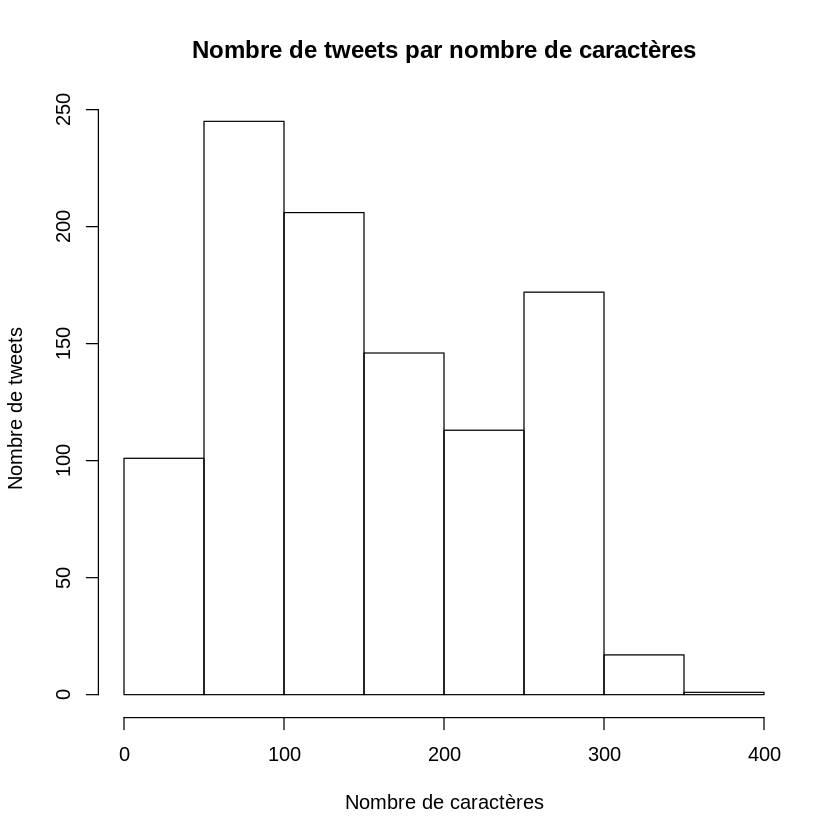

In [168]:
hist(data$nb_char, 
     main = "Number of tweets per number of characters", 
     xlab = "Number of characters", 
     ylab = "Number of tweets")

<b>Q9 - Modify the following code to produce the like count histogram. Change the title of the graph and the title of the y-axis).</b>

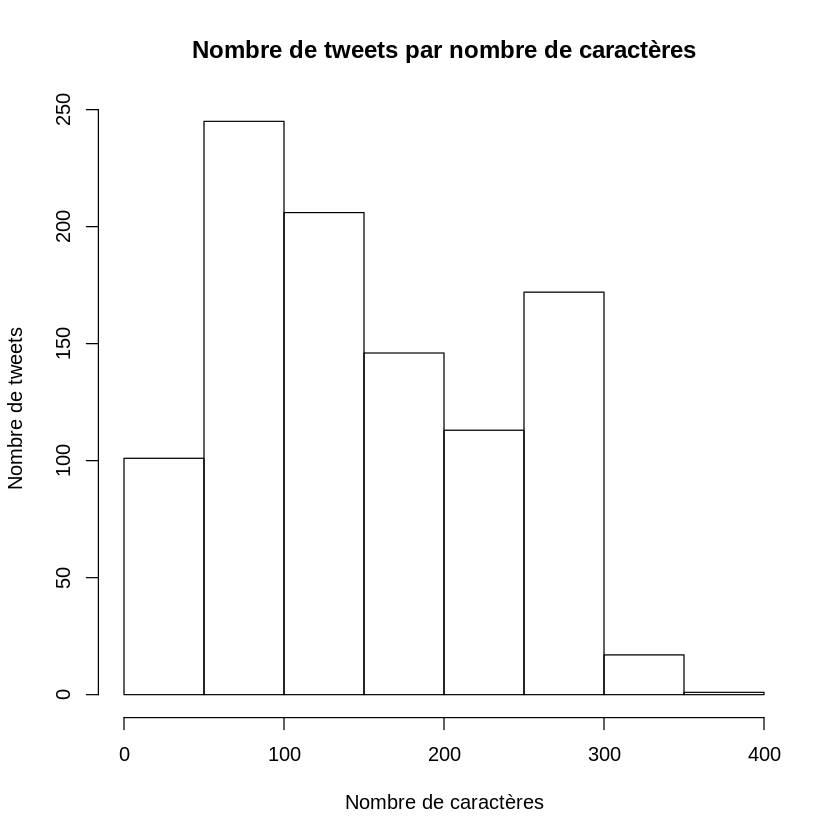

In [169]:
hist(data$nb_char, 
     main = "Number of tweets per number of characters", 
     xlab = "Number of characters", 
     ylab = "Number of tweets")

### Barplot

The barplot function produces a bar chart from an array of two columns. Here we take the array **tweets_by_days** which contains the number of tweets per day. The first variable corresponds to the number of tweets. The second variable corresponds to the day. The parameter **main** defines the title of the graph, the parameter **xlab** the title of the x-axis, the parameter **ylab** the title of the y-axis, the parameter **col** defines the color of the graph.


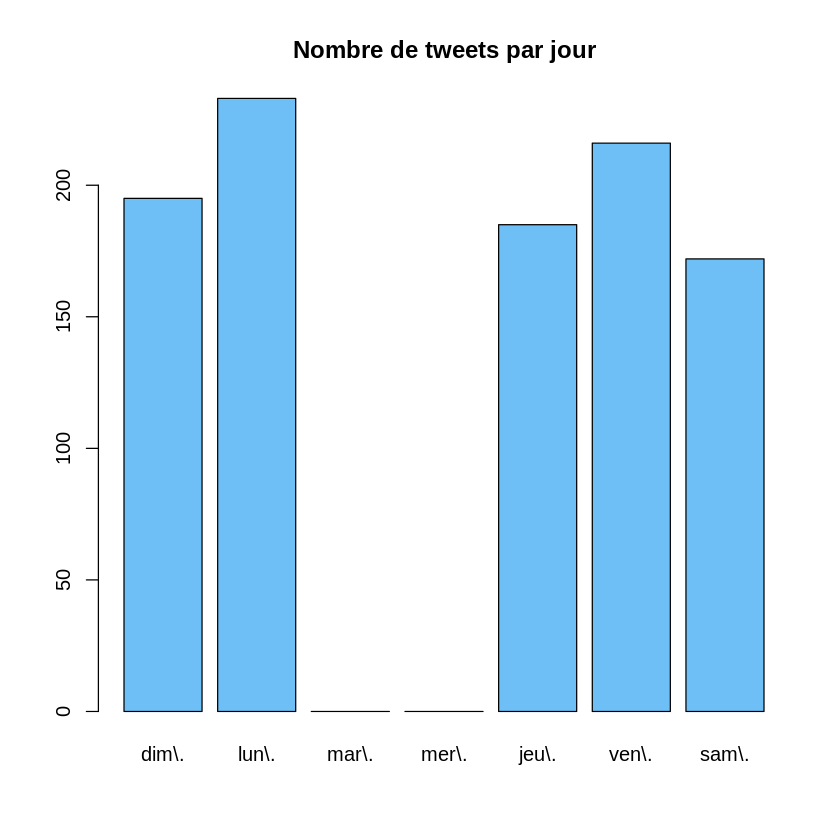

In [170]:
barplot(tweets_by_days$nb_tweets ~ tweets_by_days$day, 
        main = "Number of tweets per day", 
        xlab = "", 
        ylab = "", 
        col = "#6dbff6")

<b>Q10 - Take the code below and adapt it to produce the graph of the number of tweets per hour, from the table **tweets_by_hour**. Change the title of the graph.</b>

<b>Q11 - Adapt the code below so that the color of the graph is "red".</b>

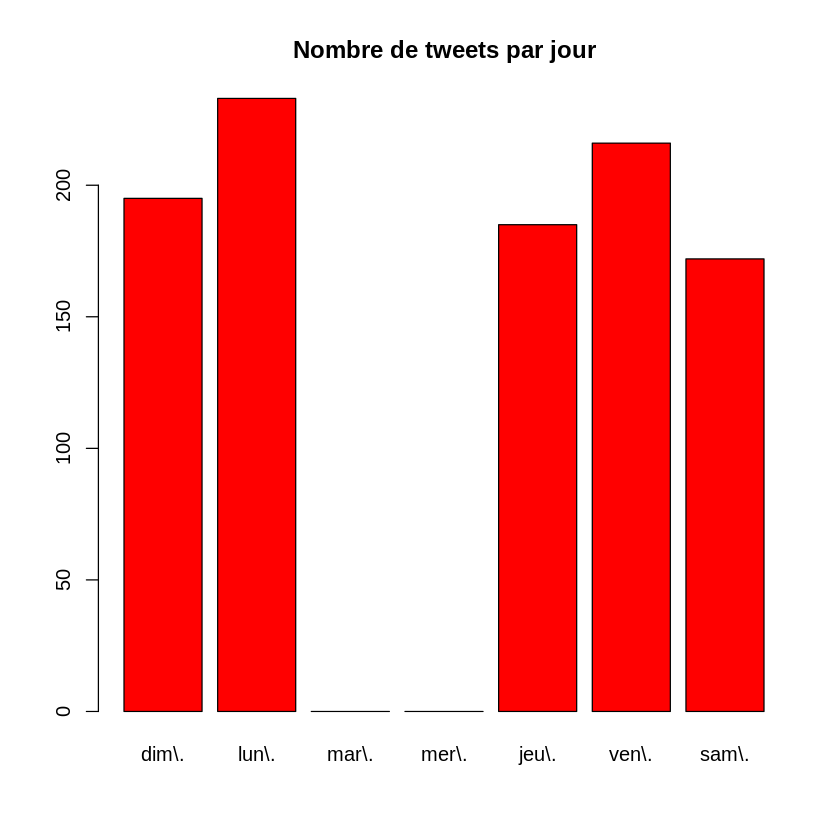

In [171]:
barplot(tweets_by_days$nb_tweets ~ tweets_by_days$day, 
        main = "Nombre de tweets par jour", 
        xlab = "", 
        ylab = "", 
        col = "#6dbff6")

## Data management (2) - Cleaning up tweets

The tweets cleaning (preprocessing) allows to homogenize the writing style between the different users. This step is necessary before each analysis. In this part, the cleaning will allow to obtain better results for our word cloud.

The functions used in the next cell will allow to : 
- Retier the urls in each tweets
- Remove the ', ', -, and duplicate spaces
- Change the text to lower case
- Remove accents
- Remove punctuation

In [1]:
# remove urls
data$tweet_clean = gsub('http\\S+\\s*', '', data$Text)

# remove \ ' spaces
data$tweet_clean =gsub("[\\]","",data$tweet_clean)
data$tweet_clean =gsub("[’']"," ",data$tweet_clean)
data$tweet_clean =gsub("-"," ",data$tweet_clean)

data$tweet_clean =gsub("\\s+"," ",data$tweet_clean)
data$tweet_clean =gsub("\\s*$"," ",data$tweet_clean)
data$tweet_clean =gsub("[\\s+]$","",data$tweet_clean)
data$tweet_clean =gsub("^[\\s+]","",data$tweet_clean)
 
# to lower case
data$tweet_clean = tolower(data$tweet_clean)

# remove accents
data$tweet_clean = gsub("[éèêë]","e",data$tweet_clean)
data$tweet_clean =gsub("[àâ]","a",data$tweet_clean)
data$tweet_clean =gsub("[ùûü]","u",data$tweet_clean)
data$tweet_clean =gsub("[ôö]","u",data$tweet_clean)

# remove ponctuation
data$tweet_clean = gsub("[?,:/.!;]","",data$tweet_clean)


ERROR: Error in data$Text: objet de type 'closure' non indiçable


### verification

We will now compare our tweets before and after the cleaning

In [174]:
head(data %>% select(Text, tweet_clean))

Text                                                                                                                                                                                                                                                                     
1 je suis simplement moins attachée à l'événement lui même mais j'ai perdu énormément confiance en moi et je suis devenu super anxieuse à propos de tout, que ce soit sociale ou scolaire, c'est 1enfer mais 1jour j'y arriverai d'acc &gt;:(                              
2 oki bientôt l'année est finie je peux dire que je suis 1peu fière de moi parce que je me rends plus malade a cause du * de mon père b et même si mon anxiété veut pas me lâcher, je me sens 1 peu moins mal de plus être autant attacher à ce qu'il s'est passé y a 2 ans
3 @juvcntusrl pareil pour l’anxiété c’est un processus et ça sattenu en plusieurs étapes et moi e crois en toi pour que tarrives a la gerer &lt;3333                                                                                                                       
4 Demain je doit me lever tôt. Je suis a un summum d'anxiété et je ne peut pas prendre de Xanax.\n\nVoila                                                                                                                                                                  
5 Ma réponse à Est-ce que l'intelligence est un vecteur d'anxiété ? https://t.co/T9Q222gzZO                                                                                                                                                                                
6 @Noathing_Art J'avoue que ça doit être l'anxiété qui me frêne, j'avais jamais fait le rapprochement ;-;                                                                                                                                                                  
  tweet_clean                                                                                                                                                                                                                                                              
1 je suis simplement moins attachee a l evenement lui meme mais j ai perdu enormement confiance en moi et je suis devenu super anxieuse a propos de tout que ce soit sociale ou scolaire c est 1enfer mais 1jour j y arriverai d acc &gt;(                                 
2 oki bientut l annee est finie je peux dire que je suis 1peu fiere de moi parce que je me rends plus malade a cause du * de mon pere b et meme si mon anxiete veut pas me lacher je me sens 1 peu moins mal de plus etre autant attacher a ce qu il s est passe y a 2 ans 
3 @juvcntusrl pareil pour l anxiete c est un processus et ça sattenu en plusieurs etapes et moi e crois en toi pour que tarrives a la gerer &lt;3333                                                                                                                       
4 demain je doit me lever tut je suis a un summum d anxiete et je ne peut pas prendre de xanax voila                                                                                                                                                                       
5 ma reponse a est ce que l intelligence est un vecteur d anxiete                                                                                                                                                                                                          
6 @noathing_art j avoue que ça doit etre l anxiete qui me frene j avais jamais fait le rapprochement ; ;

After this check, we still have some special characters to remove (punctuation, "stopwords"). <br>
The **stopwords** are empty words, i.e. words that do not add meaning to the text (e.g. coordinating conjunction, prepositions). <br> <br>
To remove punctuation and stopwords, the text must be transformed into a **corpus**. This means that the text is changed into a list of words (each sentence will be cut into a list of words). A word is characterized by a sequence of characters separated by a space.
From the word list it is easier to remove unwanted words (stopwords) and special characters (punctuation).

In [178]:
#### get corpus
corpus = Corpus(VectorSource(data$tweet_clean))

In [179]:
# remove stopwords
stopword = append(stopwords("french"), c("ça","aussi","vrai","donc","petit","bah","car","deja","quoi","encor", "mieux","toujour",
                                         "dan","tout","cest","plus","meme",'fait','bien','comm',"cett","rien","tous","trop","nest","quon","comme"))
corpus <- tm_map(corpus,removeWords,stopword)
corpus <- tm_map(corpus, removeWords,c("l","j","d","c"))

# remove spaces
corpus <- tm_map(corpus, stripWhitespace)

Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopword):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(corpus, removeWords, c("l", "j", "d", "c")):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(corpus, stripWhitespace):
“transformation drops documents”

In [180]:
tweet_clean = data.frame(text = sapply(corpus, as.character), stringsAsFactors = FALSE)
head(tweet_clean)

text                                                                                                                                                              
1  simplement moins attachee a evenement perdu enormement confiance devenu super anxieuse a propos sociale scolaire 1enfer 1jour arriverai acc &gt;(                
2 oki bientut annee finie peux dire 1peu fiere parce rends malade a cause * pere b si anxiete veut lacher sens 1 peu moins mal etre autant attacher a passe a 2 ans 
3 @juvcntusrl pareil anxiete processus sattenu plusieurs etapes e crois tarrives a gerer &lt;3333                                                                   
4 demain doit lever tut a summum anxiete peut prendre xanax voila                                                                                                   
5  reponse a intelligence vecteur anxiete                                                                                                                           
6 @noathing_art avoue doit etre anxiete frene jamais rapprochement ; ;

In [181]:
dim(tweet_clean)

[1] 339   1

### Words cloud

<b>Q12 - Adapt the code below so that the color of the word cloud ("COLOR") is "RdBu".</b>

word       freq
anxiete    anxiete    710 
anxieux    anxieux    130 
anxieuse   anxieuse   121 
etre       etre       117 
faire      faire       73 
quand      quand       64 
depression depression  63 
avoir      avoir       55 
vie        vie         53 
vraiment   vraiment    50

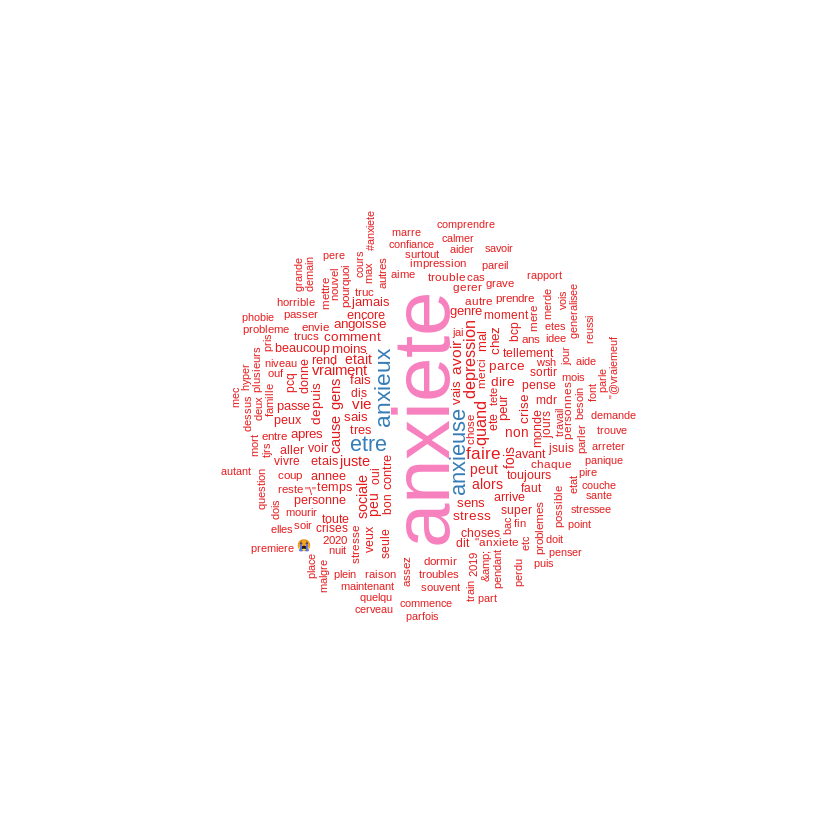

In [182]:
docs = Corpus(VectorSource(tweet_clean))
dtm <- TermDocumentMatrix(docs)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)
head(d, 10)

set.seed(1234)
wordcloud(words = d$word, freq = d$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "COLOR"))

### Top mentions (@) and hashtags (#)

Hashtags analysis: 
- Extracting hashtags 
- Calculation of the frequency of each hashtag with the **table** function
- Graphical visualization of the top 20 hashtags

In [183]:
# the pattern to detect hashtags :
pattern = "#[a-zA-Z0-9_]+"

# extraction
hashtag <- str_extract_all(tweet_clean, pattern)

# frequency calculation
hashtag_count <- table(hashtag)
top_20_freqs <- sort(hashtag_count, decreasing = TRUE)[1:20]

top_20_freqs

Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”

hashtag
            #anxiete          #resilience              #stress 
                   9                    4                    3 
       #2019in5words               #acwri            #angoisse 
                   2                    2                    2 
            #bouddha       #bourdindirect             #conflit 
                   2                    2                    2 
             #crimes                 #foi            #highered 
                   2                    2                    2 
                #jdr              #macron                #peur 
                   2                    2                    2 
             #priere #puissancedelapriere          #relaxation 
                   2                    2                    2 
            #rheaahh                #tdah 
                   2                    2 

Selecting by hashtag


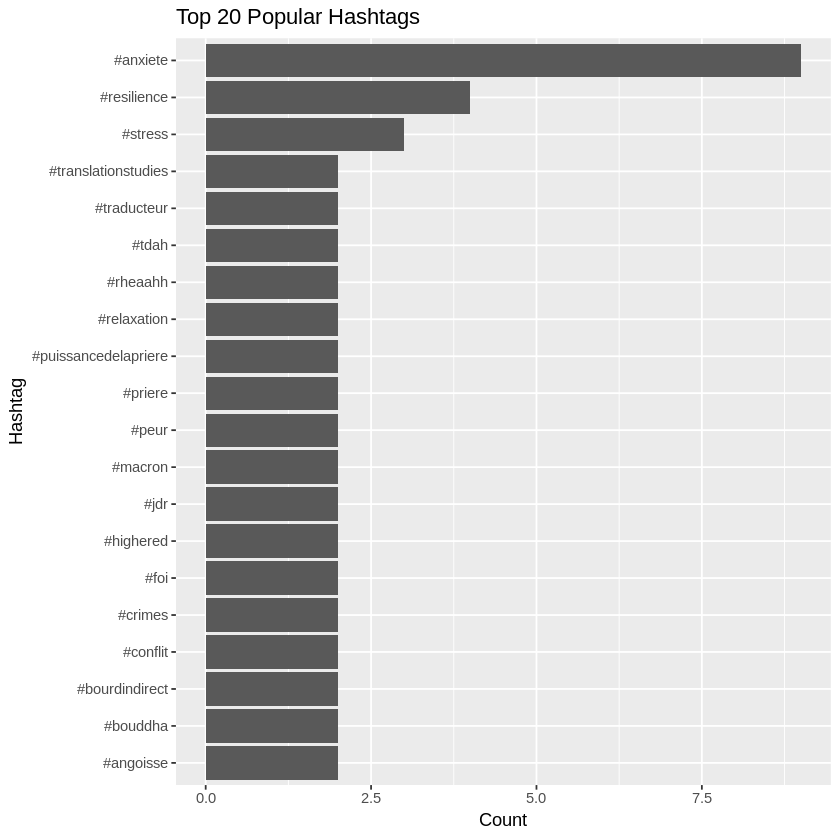

In [184]:
#visualisation
hashtag_word <- unlist(hashtag)

as.data.frame(hashtag_word) %>%
  count(hashtag_word, sort = TRUE) %>%
  mutate(hashtag = reorder(hashtag_word, n)) %>%
  top_n(20) %>%
  ggplot(aes(x = hashtag, y = n)) +
  geom_col() +
  coord_flip() +
  labs(x = "Hashtag",
       y = "Count",
       title = "Top 20 Popular Hashtags")

<b>Q13 - Adapt the code below to analyze and graph the most frequent mentions (@) by replacing the # pattern with @.</b> 

 <p style="color:#21618c";><b>Adapt the title of the graphic.</b> <p/>

In [186]:
pattern_mention = "#[a-zA-Z0-9_]+"

# extraction
mention <- str_extract_all(tweet_clean, pattern_mention)

mention_count <- table(mention)
top_20_freqs_mention <- sort(mention_count, decreasing = TRUE)[1:20]

top_20_freqs_mention

Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”

mention
      @vraiemeuf      @asiatitude       @livressee           @horia 
               9                7                5                4 
      @enzorebut    @femmehomtaie @ilyatonsourire_   @jeanalexanian 
               3                3                3                3 
            @lci     @psychomedia        @twoinou_    @arianagrande 
               3                3                3                2 
     @badidea_ag          @baejsk    @brutofficiel       @cdanslair 
               2                2                2                2 
     @deasylizzy        @deezerfr @evanvaerenbergh    @grandetourfr 
               2                2                2                2 

Selecting by mention


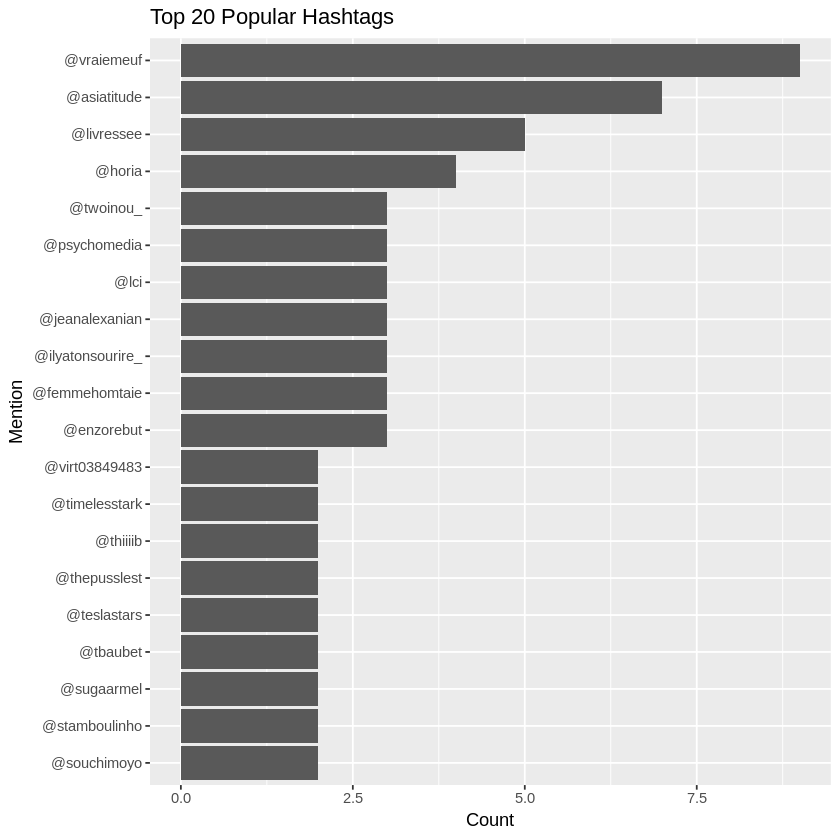

In [187]:
#visualisation
mention_word <- unlist(mention)

as.data.frame(mention_word) %>%
  count(mention_word, sort = TRUE) %>%
  mutate(mention = reorder(mention_word, n)) %>%
  top_n(20) %>%
  ggplot(aes(x = mention, y = n)) +
  geom_col() +
  coord_flip() +
  labs(x = "Mention",
       y = "Count",
       title = "Top 20 Popular Hashtags")

<b>Q14 - Export the notebook in PDF format (top left, File / Export Notebook As... / PDF. Send it to me by email.</b>

## 